# FILE PREPARATION!

url source: https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset?resource=download

---

## **Library**

In [1]:
#@title
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf

# libraries for TF and transfer learning
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# warnings
import warnings
warnings.filterwarnings('ignore')

print('importing libraries completed.')

importing libraries completed.


## **Data Preparation**

In [2]:
# Connect Google Collab with your Google Drive
# This will prompt you to authorize access to your Google Drive. 
# Follow the instructions and enter the authorization code.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title
# /content/Drive/MyDrive is the root folder when you open a google drive
# just add the target folder, in this case, the zip file is stored
# in the folder Dataset
!unzip '/content/drive/MyDrive/Dataset/fruits & vegetables.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (444).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (445).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (446).JPG  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (447).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (448).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (449).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (45).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (450).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (451).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (452).jpg  
  inflating: Fruits_

In [4]:
#@title
mypath = '/content/Fruits_Vegetables_Dataset(12000)'

In [5]:
#@title
# This code will traverse the directory and each of its subfolders
# grab their filename, and path. And then input it into the full_path by
# appending the path name and the filename, tag is the name of the folder which
# corresponds to the image label
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    # print(files)
    # print(path)
    # print(subdirs)
    for name in files:
        full_path.append(os.path.join(path, name).replace("\\","/")) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
#@title
# input the variables that have been collected in the loop above
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
FreshApple          612
FreshBanana         624
FreshBellpepper     611
FreshCarrot         620
FreshCucumber       608
FreshMango          605
FreshOrange         609
FreshPotato         615
FreshStrawberry     603
FreshTomato         604
RottenApple         588
RottenBanana        576
RottenBellpepper    591
RottenCarrot        580
RottenCucumber      593
RottenMango         593
RottenOrange        591
RottenPotato        585
RottenStrawberry    596
RottenTomato        596
dtype: int64

In [7]:
#@title
# check the sample data
df.head()

,path,file_name,tag
0,/content/Fruits_Vegetables_Dataset(12000)/Vege...,freshPotato (219).jpg,FreshPotato
1,/content/Fruits_Vegetables_Dataset(12000)/Vege...,freshPotato (97).jpg,FreshPotato
2,/content/Fruits_Vegetables_Dataset(12000)/Vege...,freshPotato (534).jpg,FreshPotato
3,/content/Fruits_Vegetables_Dataset(12000)/Vege...,freshPotato (508).jpg,FreshPotato
4,/content/Fruits_Vegetables_Dataset(12000)/Vege...,freshPotato (430).jpg,FreshPotato


In [8]:
#@title
# variables used in this data separation
x = df['path']
y = df['tag']

In [9]:
#@title
# split the initial dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10, random_state=300)

In [10]:
#@title
# divide the test data into 2 (validation and test data)
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=100)

In [11]:
#@title
# lump it into each dataframe
# create a dataframe for each of the split
df_train = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':x_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':x_val
              ,'tag':y_val
             ,'set':'validation'})

In [12]:
#@title
print('train size', len(df_train))
print('val size', len(df_test))
print('test size', len(df_val))

train size 10800
val size 600
test size 600


In [13]:
#@title
# check the proportions in each set, is it appropriate or not
df_all = df_train.append([df_test,df_val]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

# check the sample data
df_all.sample(3)


set         tag             
test        FreshApple           34
            FreshBanana          33
            FreshBellpepper      29
            FreshCarrot          29
            FreshCucumber        29
            FreshMango           28
            FreshOrange          41
            FreshPotato          23
            FreshStrawberry      31
            FreshTomato          28
            RottenApple          34
            RottenBanana         30
            RottenBellpepper     19
            RottenCarrot         22
            RottenCucumber       25
            RottenMango          39
            RottenOrange         30
            RottenPotato         43
            RottenStrawberry     24
            RottenTomato         29
train       FreshApple          541
            FreshBanana         562
            FreshBellpepper     546
            FreshCarrot         562
            FreshCucumber       553
            FreshMango          539
            FreshOrange         54

,path,tag,set
1645,/content/Fruits_Vegetables_Dataset(12000)/Frui...,FreshOrange,train
6090,/content/Fruits_Vegetables_Dataset(12000)/Vege...,FreshBellpepper,train
5026,/content/Fruits_Vegetables_Dataset(12000)/Vege...,FreshTomato,train


## **Tidy Up to Each Set Folder**

In [ ]:
#@title
# delete previous dataset folder if needed
# !rm -rf dataset/

In [14]:
#@title
# We import shutil to copy files from one folder to another
# We import tqdm to give a progress bar when we are copying the files in the code
# below
import shutil
from tqdm.notebook import tqdm as tq

In [15]:
#@title
# Create the data source path and the destination of the dataset path
datasource_path = '/content/Fruits_Vegetables_Dataset(12000)'
dataset_path = '/content/fruits & vegetables dataset'

In [16]:
#@title
for index, row in tq(df_all.iterrows(), ):
    
    #detect filepath
    #grab the file path from our row, row represents the data that we have

    print(row)
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs if it doesn't exist. If it exists then we won't be making
    #the folder. this will make ex: '/content/fruits & vegetables dataset/train/FreshCucumber'
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    #Get the filename using .split, we then join the dataset_path, row['set'] (train/val/test), and
    #row['tag'] (FreshCucumber, FreshApple, etc) into the file_dest variable
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    # if the file already exists in the destination path, then it won't be copied
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
path    /content/Fruits_Vegetables_Dataset(12000)/Vege...
tag                                           FreshPotato
set                                                 train
Name: 10750, dtype: object
path    /content/Fruits_Vegetables_Dataset(12000)/Vege...
tag                                           FreshPotato
set                                                 train
Name: 10751, dtype: object
path    /content/Fruits_Vegetables_Dataset(12000)/Vege...
tag                                          RottenTomato
set                                                 train
Name: 10752, dtype: object
path    /content/Fruits_Vegetables_Dataset(12000)/Vege...
tag                                          RottenPotato
set                                                 train
Name: 10753, dtype: object
path    /content/Fruits_Vegetables_Dataset(12000)/Frui...
tag                                          RottenBanana
set                          

# **Data Preprocessing**

---



In [17]:
#@title
# make a train, validation, & test directory, also print the sub directories (our label)
train_dir = "/content/fruits & vegetables dataset/train"
train_class = os.listdir(train_dir)
print(train_class)
print("\n")

val_dir = "/content/fruits & vegetables dataset/validation"
val_class = os.listdir(val_dir)
print(val_class)
print("\n")

test_dir = "/content/fruits & vegetables dataset/test"
test_class = os.listdir(test_dir)
print(test_class)

['RottenApple', 'FreshPotato', 'FreshStrawberry', 'FreshOrange', 'FreshMango', 'RottenStrawberry', 'FreshBanana', 'RottenPotato', 'FreshTomato', 'RottenCarrot', 'FreshBellpepper', 'RottenBanana', 'RottenOrange', 'FreshCarrot', 'FreshCucumber', 'FreshApple', 'RottenBellpepper', 'RottenTomato', 'RottenCucumber', 'RottenMango']


['RottenApple', 'FreshPotato', 'FreshStrawberry', 'FreshOrange', 'FreshMango', 'RottenStrawberry', 'FreshBanana', 'RottenPotato', 'FreshTomato', 'RottenCarrot', 'FreshBellpepper', 'RottenBanana', 'RottenOrange', 'FreshCarrot', 'FreshCucumber', 'FreshApple', 'RottenBellpepper', 'RottenTomato', 'RottenCucumber', 'RottenMango']


['RottenApple', 'FreshPotato', 'FreshStrawberry', 'FreshOrange', 'FreshMango', 'RottenStrawberry', 'FreshBanana', 'RottenPotato', 'FreshTomato', 'RottenCarrot', 'FreshBellpepper', 'RottenBanana', 'RottenOrange', 'FreshCarrot', 'FreshCucumber', 'FreshApple', 'RottenBellpepper', 'RottenTomato', 'RottenCucumber', 'RottenMango']


In [18]:
#@title
# Preprocess the image using the preprocess_input function that we imported from mobilenetv2
# This code will preprocess the images in the training dataset
x=[] # array value of the images
y=[] # the labels of the images

# For each folder in the training directory, grab every image and prepocess it
for folder in os.listdir(train_dir):
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        # use tf.keras.preprocessing.image.load_img to shrink the image to 224,224 a format
        # that is needed for mobilenetv2
        img = image.load_img(train_dir+"/" + folder+"/" + img_name, target_size=(224,224))

        # use tf.keras.preprocessing.image.img_to_array to turn our image into an array
        # of numbers
        img = image.img_to_array(img)
        
        # Transfer Learning: Preprocess of MobileNetV2 model to our images before passing it to MobileNetV2
        img = preprocess_input(img)
        
        x.append(img) # appending image array
        y.append(train_class.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [19]:
#@title
val_images=[]
val_images_original=[]
val_image_label=[]

for folder in os.listdir(val_dir):
    image_list=os.listdir(val_dir + "/" + folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir + "/" + folder + "/" + img_name, target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        val_images.append(img)
        val_image_label.append(val_class.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [20]:
#@title
test_images=[]
test_images_original=[]
test_image_label=[]

for folder in os.listdir(test_dir):
    image_list=os.listdir(test_dir + "/" + folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_dir + "/" + folder + "/" + img_name, target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        test_images.append(img)
        test_image_label.append(test_class.index(folder))
        
print("Preparing Test Dataset Completed.")

Preparing Test Dataset Completed.


## **Sample Images**

In [21]:
#@title
# define the variables
random_img1 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/FreshApple'), 4)
random_img2 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/RottenMango'), 4)

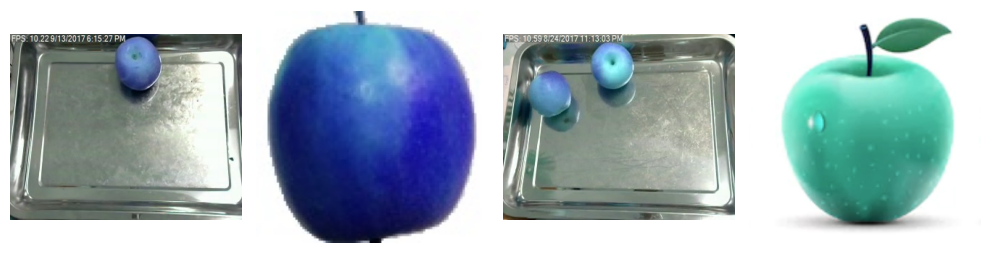

In [22]:
#@title
# plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img1):
  plt.subplot(2, 4, i+1)
  im = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/FreshApple', im))
  plt.imshow(im)
  plt.axis('off')

plt.tight_layout()
plt.show()

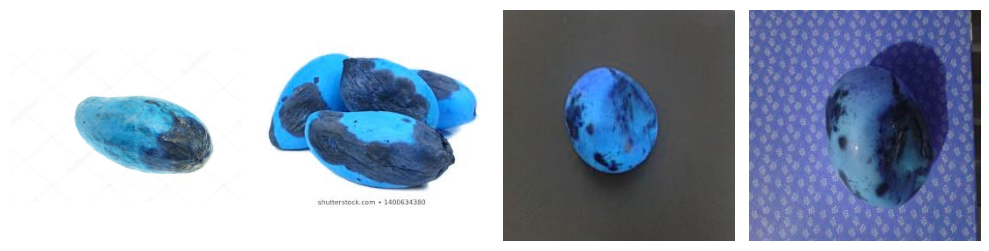

In [23]:
#@title
# plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img2):
  plt.subplot(2, 4, i+1)
  im = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/RottenMango', im))
  plt.imshow(im)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Train**

---

## **Image Augmentation**

In [24]:
#@title
def train_val_generators(train_dir, val_dir):
# Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

# Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=45,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

# Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale = 1./255.)  

# Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=45,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [25]:
#@title
# test the generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 10788 images belonging to 20 classes.
Found 600 images belonging to 20 classes.


##**Model Building**

In [69]:
#@title
# building models
mnet = MobileNetV2(include_top = False, weights = 'imagenet', input_shape=(224,224,3))

In [45]:
# EXPERIMENTAL: Freeze some of the layer in hopes of getting higher accuracy and decreased training time
mnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### **EXPERIMENTAL: DO NOT UNCOMMENT**

In [84]:
# EXPERIMENTAL

# last_layer = mnet.get_layer('block_8_expand_relu')
# print(f"shape of the last layer is: {last_layer.output_shape}")
# last_output = last_layer.output
# # last_output = tf.keras.layers.Flatten()(last_output) 
# last_output = tf.keras.layers.GlobalAveragePooling2D()(last_output)
# last_output = tf.keras.layers.Dense(512, activation = "relu")(last_output)
# last_output = tf.keras.layers.BatchNormalization()(last_output)
# last_output = tf.keras.layers.Dense(128, activation = "relu")(last_output)
# last_output = tf.keras.layers.Dropout(0.1)(last_output)
# last_output = tf.keras.layers.Dense(64, activation = "relu")(last_output)
# last_output = tf.keras.layers.Dropout(0.3)(last_output)
# pred = tf.keras.layers.Dense(20, activation = "softmax")(last_output)

shape of the last layer is: (None, 14, 14, 384)


In [85]:
# EXPERIMENTAL Testing Architecture
#@title
# tf.keras.backend.clear_session()

# model = tf.keras.Model(inputs = mnet.input,
#                     outputs = pred                
#                     )

# # model.layers[0].trainable = False

# model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

# model.summary()
# Model: "sequential"

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [86]:
# EXPERIMENTAL TESTING: Freeze some of the layer
# for layer in model.layers[:-7]:
#   layer.trainable = False
# model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

List of Tried Transfer Learning Layer:
We use relu type as the output because it is the same as the original mobilenet output
- Use original mobilenet as our first layer (does not change the layer):
accuracy got 60% after 1 epoch, with similar val accuracy (10 minutes per epoch). Ends with 90% test and val accuracy, 85% train acc
- Use block_4_expand_relu as output:
accuracy got 40% after 1 epoch, with 6% val accuracy, took 30 minutes for 1 epoch
- Use block_12_expand_relu as output:
Accuracy got 57% after 1 epoch, with 27% val accuracy, took 20 minutes for 1 epoch, val accuracy does not improve, 
training accuracy reached 80% after 2 epoch
- block_3_depthwise_relu
Accuracy reached 35% with 26% val accuracy, time took to finish 1 epoch is 9 minutes
- block_7_expand_relu
Accuracy reached 51% with 63% val accuracy, time took to finish 1 epoch is 10 minutes, val accuracy does not
change 

### **Original Model Architecture [Working]**

In [88]:
#@title
# This one Got us to 90% accuracy
tf.keras.backend.clear_session()

model = Sequential([mnet,                 
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    Dense(64, activation = "relu"),
                    Dropout(0.3),
                    Dense(20, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

 **Callbacks**

In [73]:
#@title
def scheduler(epoch):
  if epoch <= 2:
    return 0.001
  elif epoch > 2 and epoch <= 15:
    return 0.0001
  else:
    return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#@title
#DESIRED_ACCURACY = 0.90

#class MyCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if (logs.get('accuracy') is not None and logs.get('accuracy') >= DESIRED_ACCURACY):
#            print("\nReached accuracy threshold! Terminating training.")
#            self.model.stop_training = True
            
#callbacks = MyCallback()

## **Training**

In [89]:
#@title
epochs = 3
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = lr_callbacks
                    )

Epoch 1/3
240/240 [==============================] - 712s 3s/step - loss: 1.4599 - accuracy: 0.5743 - val_loss: 0.7594 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 2/3
240/240 [==============================] - 710s 3s/step - loss: 0.9080 - accuracy: 0.7320 - val_loss: 0.7195 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3/3
240/240 [==============================] - 708s 3s/step - loss: 0.7991 - accuracy: 0.7602 - val_loss: 0.5529 - val_accuracy: 0.8133 - lr: 0.0010


## **Visualizing the accuracy and loss**

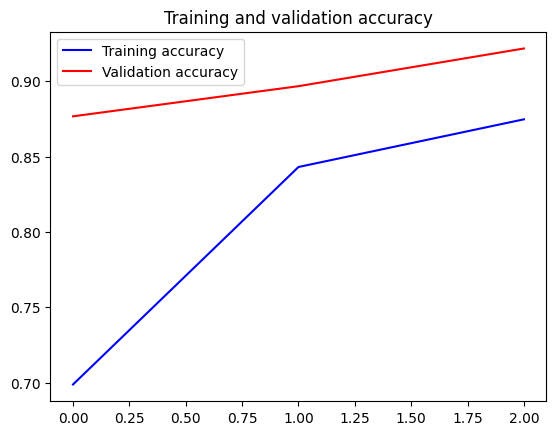

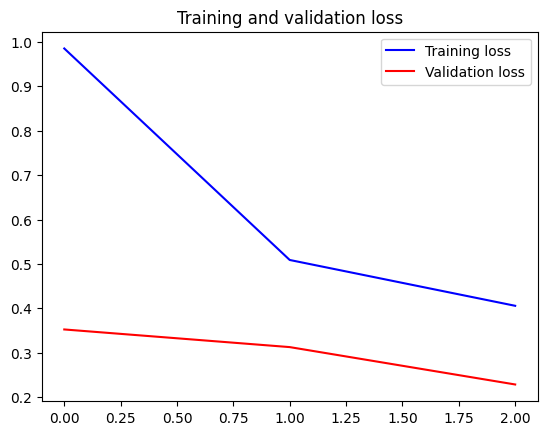

In [30]:
#@title
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Predicting an Image**

In [31]:
from google.colab import files
from PIL import Image

In [33]:
# sort the classes of the dataset, we need it sorted if we want to get an accurate prediction
image_class = os.listdir('/content/fruits & vegetables dataset/train')
image_class.sort()
print(image_class)

['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshCarrot', 'FreshCucumber', 'FreshMango', 'FreshOrange', 'FreshPotato', 'FreshStrawberry', 'FreshTomato', 'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenCarrot', 'RottenCucumber', 'RottenMango', 'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']


In [35]:
# Upload the file from our local storage
image_upload = files.upload()

# Get the file name
file_name = next(iter(image_upload))

# Load the Image
image_file = Image.open(file_name)
image_file = image_file.convert('RGB')

# resize the image to 224,224, the format that is needed by the model
img = tf.image.resize(image_file, (224, 224))
img_array = tf.keras.utils.img_to_array(img)

# Normalize the image
normalized_image = img_array / 255.0

img = tf.expand_dims(normalized_image, axis = 0)

# Predict the image
prediction = model.predict(img)[0]
print(image_class[np.argmax(prediction)])

# Delete the image from our directory after we are done predicting 
if os.path.exists(f"{file_name}"):
  os.remove(f"{file_name}")


Saving freshApple (159).jpg to freshApple (159).jpg
1/1 [==============================] - 0s 111ms/step
FreshApple


In [42]:
# Use the test dataset to calculate the accuracy of test set
directories = os.listdir('fruits & vegetables dataset/test')
correct = 0
total_image = 0
for directory in directories:
  files = os.listdir(f'fruits & vegetables dataset/test/{directory}')
  for file in files:
    # grab our image files from our directory
    image_file = Image.open(f'fruits & vegetables dataset/test/{directory}/{file}')

    # convert it into RGB, our image is RGBA which has (n x n x n x 4) dimension
    # we also resize it into 224 by 224 and turn it into an array of int
    image_file = image_file.convert('RGB')
    img = tf.image.resize(image_file, (224, 224))
    img_array = tf.keras.utils.img_to_array(img)

    # Normalize the image, it becomes a float
    normalized_image = img_array / 255.0

    # makes it n x 224 x 224 x 3
    img = tf.expand_dims(normalized_image, axis = 0)

    # Predict the image
    prediction = model.predict(img, verbose = 0)[0]

    # Adds the total number of images predicted, if it is correct, adds also
    # the total correct number
    total_image = total_image + 1 
    if (image_class[np.argmax(prediction)]) == f'{directory}':
      correct = correct + 1
correct_percentage = (correct/total_image) * 100
print(f"Accuracy: {round(correct_percentage,2)}%")

Accuracy: 90.17%
